In [6]:
# import sys
# !{sys.executable} -m pip install gradio

In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
# import gradio as gr
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('3-conv-64-nodes-1-dense-512-1669611358')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        3

In [11]:
labels = ['A',
 'B',
 'BA',
 'BE/BI',
 'BO/BU',
 'D',
 'DA',
 'DE/DI',
 'DO/DU',
 'E/I',
 'G',
 'GA',
 'GE/GI',
 'GO/GU',
 'H',
 'HA',
 'HE/HI',
 'HO/HU',
 'K',
 'KA',
 'KE/KI',
 'KO/KU',
 'L',
 'LA',
 'LE/LI',
 'LO/LU',
 'M',
 'MA',
 'ME/MI',
 'MO/MU',
 'N',
 'NA',
 'NE/NI',
 'NG',
 'NGA',
 'NGE/NGI',
 'NGO/NGU',
 'NO/NU',
 'O/U',
 'P',
 'PA',
 'PE/PI',
 'PO/PU',
 'R',
 'RA',
 'RE/RI',
 'RO/RU',
 'S',
 'SA',
 'SE/SI',
 'SO/SU',
 'T',
 'TA',
 'TE/TI',
 'TO/TU',
 'W',
 'WA',
 'WE/WI',
 'WO/WU',
 'Y',
 'YA',
 'YE/YI',
 'YO/YU']

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


{'A': 1.403523667433025e-18,
 'B': 1.147261400546995e-06,
 'BA': 6.11298331137949e-16,
 'BE/BI': 6.325176605490599e-15,
 'BO/BU': 1.675131358069848e-07,
 'D': 0.9150702357292175,
 'DA': 5.829975391336006e-10,
 'DE/DI': 2.3441757424080834e-09,
 'DO/DU': 0.007057424634695053,
 'E/I': 1.0765780628085864e-12,
 'G': 7.224221917567775e-05,
 'GA': 2.0367552089339824e-10,
 'GE/GI': 1.6893949313209668e-15,
 'GO/GU': 6.216905745759504e-08,
 'H': 9.203967056237161e-05,
 'HA': 3.776391905348925e-13,
 'HE/HI': 1.8742667862170492e-08,
 'HO/HU': 1.1355271584134741e-10,
 'K': 0.06144190952181816,
 'KA': 1.757867948981584e-07,
 'KE/KI': 4.241215719957836e-06,
 'KO/KU': 0.00221593608148396,
 'L': 0.0008320430060848594,
 'LA': 3.8657139989073386e-11,
 'LE/LI': 2.986568770069198e-09,
 'LO/LU': 2.636291719682049e-05,
 'M': 2.6750849428935908e-06,
 'MA': 3.215974989465725e-16,
 'ME/MI': 1.2608926402979392e-10,
 'MO/MU': 9.875670281545013e-10,
 'N': 3.437415216467343e-05,
 'NA': 1.2797416957255336e-06,
 'NE/

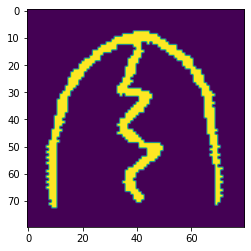

In [44]:
def classify_image(inp):
    # i = Image.fromarray(inp, mode="RGB")
    im = inp.convert('L')
    im = im.resize((80,80))
    img_array = np.array(im)
    img_array = np.invert(img_array)
    print(img_array)
    img_array = img_array / 255
    plt.imshow(img_array)
    img_array = img_array.reshape((-1, 80, 80, 1))
    prediction = model.predict(img_array)[0]
    confidences = {labels[i]: float(prediction[i]) for i in range(63)}
    return confidences

# filename = f'cropped/A/A-0.png'
filename = f'sample2.png'
image = Image.open(filename)

classify_image(image)